# Import Libraries for DataFrame handling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset.

df = pd.read_csv('Suicide_Detection.csv')
df.head(4)

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide


In [ ]:
# Drop the unneccessery column Unnamed: 0.

df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Checking null values.

df.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
# Check if the data is balanced or imbalanced

df['class'].value_counts()

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64

In [ ]:
# Creating the Lenght column.

df['text_length'] = df['text'].apply(len)
df['text_length'].head(4)

0    715
1    138
2    129
3     41
Name: text_length, dtype: int64

<Axes: ylabel='Frequency'>

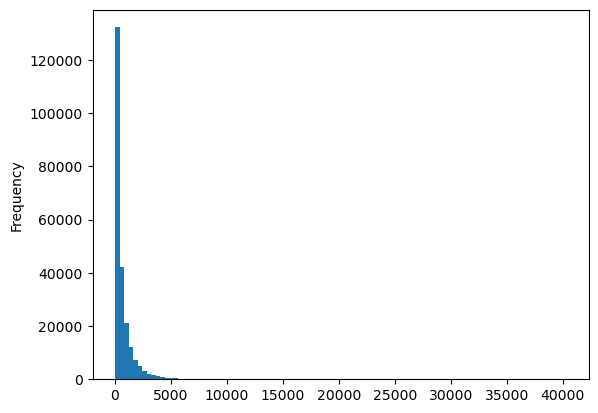

In [ ]:
# Creating the histogram of lenght column.

df['text_length'].plot(bins=100,kind='hist')

# Importing Liabraries for Text Preprocessing.

In [ ]:
# Downloading Stopwords to deal with stopwords which is having in dataset.

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Importing Stopwords to deal with stopwords which is present in dataset.

import string
from nltk.corpus import stopwords

In [ ]:
# Checking Stopwords

stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
# Importing punctuation to deal with it which is present in dataset.

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Cheaking the punctuation.

[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
# Creating a function which removes Punctuation and stopwords from the data to clean the text column.

stop_words = set(stopwords.words("english"))

def text_clean(text):
    # remove punctuation
    nopunc_text = ''.join([char for char in text if char not in string.punctuation])
    
    # remove stopwords
    return ' '.join([word for word in nopunc_text.split() if word.lower() not in stop_words])

In [ ]:
# Applying text_clean function to the text column and creating new column clean_text.

df['clean_text'] = df['text'].apply(text_clean)

In [ ]:
# Cheking the clean_text.

df['clean_text']

0         Ex Wife Threatening SuicideRecently left wife ...
1         weird dont get affected compliments coming som...
2         Finally 2020 almost never hear 2020 bad year e...
3                         need helpjust help im crying hard
4         I’m lostHello name Adam 16 I’ve struggling yea...
                                ...                        
232069    dont like rock going get anything go httpsmusi...
232070    tell many friends lonely everything deprived p...
232071    pee probably tastes like salty tea😏💦‼️ someone...
232072    usual stuff find hereIm posting sympathy pity ...
232073    still havent beaten first boss Hollow Knight I...
Name: clean_text, Length: 232074, dtype: object

In [ ]:
# Importing re to remove emojis and special unicode symbols. Also create a function remove_emojis for clean the clean_text column.

import re

def remove_emojis(clean_text):
    # ✅ remove emojis & special unicode symbols
    clean_text = re.sub(r"[^\x00-\x7F]+", " ", clean_text)
    return clean_text

In [ ]:
# Applying remove_emojis function on clean_text column.

df['clean_text'] = df['clean_text'].apply(remove_emojis)

In [ ]:
# Cheaking the clean_text

df['clean_text']

0         Ex Wife Threatening SuicideRecently left wife ...
1         weird dont get affected compliments coming som...
2         Finally 2020 almost never hear 2020 bad year e...
3                         need helpjust help im crying hard
4         I m lostHello name Adam 16 I ve struggling yea...
                                ...                        
232069    dont like rock going get anything go httpsmusi...
232070    tell many friends lonely everything deprived p...
232071    pee probably tastes like salty tea  someone dr...
232072    usual stuff find hereIm posting sympathy pity ...
232073    still havent beaten first boss Hollow Knight I...
Name: clean_text, Length: 232074, dtype: object

In [ ]:
# Creating function to remove urls, html tags and numbers from clean_text column.

def remove_numb_tags_urls(clean_text):
    clean_text = clean_text.lower()
    clean_text = re.sub(r"http\S+", "", clean_text)  # remove URLs
    clean_text = re.sub(r"<.*?>", "", clean_text)    # remove HTML tags
    clean_text = re.sub(r"\d+", "", clean_text)      # remove numbers
    return clean_text

In [ ]:
# Applying function to remove urls, html tags and numbers from clean_text column. 

df['clean_text'] = df['clean_text'].apply(remove_numb_tags_urls)

In [ ]:
# Creating the new dataframe which contains text and class column which is important for model training.

new_df = df[['clean_text','class']]

In [ ]:
# Creating copy of the new_df for insuare the data. Also we can train our model on copy dataset.

new_df_copy = new_df.copy()

# Importing Liabraries for Model Training.

In [ ]:
# Importing Machine Learning Liabraries.

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Split data for the training and testing.

text_train, text_test, class_train, class_test = train_test_split(new_df_copy['clean_text'],new_df_copy['class'],test_size=0.2, random_state=42)

In [ ]:
# Shape of the text data.

print("Text train size:", text_train.shape[0])
print("Text test size :", text_test.shape[0])

Text train size: 185659
Text test size : 46415


In [ ]:
# Shape of the class data.

print("Class train size:", class_train.shape[0])
print("Class test size :", class_test.shape[0])

Class train size: 185659
Class test size : 46415


# Model Building

In [ ]:
# Why these TF-IDF params (quick)
# ngram_range=(1,2) → captures phrases like “kill myself”
# min_df=2 → removes rare noise/typos
# max_df=0.90 → removes too-common words
# max_features=20000 → enough vocabulary without huge memory
# sublinear_tf=True → uses log-scaling of term frequency (often helps)

tfidf_vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1, 2), min_df=2, max_df=0.90, sublinear_tf=True)

In [ ]:
# Fit and transforme the data.

train_tfidf = tfidf_vectorizer.fit_transform(text_train)
test_tfidf  = tfidf_vectorizer.transform(text_test)

In [ ]:
# Cheaking the shape of the teain and test data.

print("TF-IDF Train Shape:", train_tfidf.shape)
print("TF-IDF Test Shape :", test_tfidf.shape)

TF-IDF Train Shape: (185659, 20000)
TF-IDF Test Shape : (46415, 20000)


In [ ]:
# Train the data using Logistic Regressor Algorithm

log_model = LogisticRegression(max_iter=1000)
log_model.fit(train_tfidf, class_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [ ]:
# Prediction on test_tfidf.

preds = log_model.predict(test_tfidf)

In [ ]:
# Cheaking prediction.
preds

array(['suicide', 'non-suicide', 'non-suicide', ..., 'non-suicide',
       'non-suicide', 'suicide'], shape=(46415,), dtype=object)

In [ ]:
# Cheaking the Accuracy Score, Confusion Matrix and Classification Report.

print("\n==============================")
print("Accuracy:", accuracy_score(class_test, preds))
print("Confusion Matrix:\n", confusion_matrix(class_test, preds))
print("Classification Report:\n", classification_report(class_test, preds))


Accuracy: 0.9382527200258537
Confusion Matrix:
 [[22010  1277]
 [ 1589 21539]]
Classification Report:
               precision    recall  f1-score   support

 non-suicide       0.93      0.95      0.94     23287
     suicide       0.94      0.93      0.94     23128

    accuracy                           0.94     46415
   macro avg       0.94      0.94      0.94     46415
weighted avg       0.94      0.94      0.94     46415



# Test the model on custom text (Manual Testing)

In [ ]:
# Testing our model on Custome Text.

sample_texts = [
    # Non-Suicide (Normal / Safe) Samples

"I am feeling good today and I want to focus on my career and goals.",
"Life is stressful but I will manage it and everything will be okay.",
"I had a bad day but talking to my friend made me feel better.",
"I feel anxious about exams but I am working hard and improving.",
"I am tired and need rest, tomorrow will be better.",

    # Suicide (Risk) Samples

"I can't take this anymore, I want to end my life.",
"I feel like I should die, nothing matters to me anymore.",
"I want to kill myself, I don't want to live.",
"Everyone would be better without me, I just want to disappear forever.",
"I feel hopeless and I have no reason to live anymore.",

]

# Convert to TF-IDF
sample_vec = tfidf_vectorizer.transform(sample_texts)

# Predict
preds = log_model.predict(sample_vec)

for text, pred in zip(sample_texts, preds):
    print("\nText:", text)
    print("Prediction:", pred)


Text: I am feeling good today and I want to focus on my career and goals.
Prediction: non-suicide

Text: Life is stressful but I will manage it and everything will be okay.
Prediction: non-suicide

Text: I had a bad day but talking to my friend made me feel better.
Prediction: non-suicide

Text: I feel anxious about exams but I am working hard and improving.
Prediction: non-suicide

Text: I am tired and need rest, tomorrow will be better.
Prediction: non-suicide

Text: I can't take this anymore, I want to end my life.
Prediction: suicide

Text: I feel like I should die, nothing matters to me anymore.
Prediction: suicide

Text: I want to kill myself, I don't want to live.
Prediction: suicide

Text: Everyone would be better without me, I just want to disappear forever.
Prediction: suicide

Text: I feel hopeless and I have no reason to live anymore.
Prediction: suicide

Text: i am ehxusted i want to die
Prediction: non-suicide


# Save the Model

In [ ]:
# Import Joiblib for model saving

import joblib

# Save
joblib.dump(log_model, "suicide_logreg_model.joblib")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.joblib")

print("✅ Saved: suicide_logreg_model.joblib and tfidf_vectorizer.joblib")

✅ Saved: suicide_logreg_model.joblib and tfidf_vectorizer.joblib


In [ ]:
import re
import string
import joblib
import numpy as np
import streamlit as st

# Optional: use NLTK stopwords (matches your notebook closely)
import nltk
from nltk.corpus import stopwords

st.set_page_config(page_title="Suicide Detection", page_icon="🧠", layout="centered")

# ----------------------------
# 1) Load model + vectorizer
# ----------------------------
@st.cache_resource
def load_artifacts():
    model = joblib.load("suicide_logreg_model.joblib")
    vectorizer = joblib.load("tfidf_vectorizer.joblib")
    return model, vectorizer

model, vectorizer = load_artifacts()

# ----------------------------
# 2) Prepare stopwords
# ----------------------------
@st.cache_resource
def get_stopwords():
    try:
        stop_words = set(stopwords.words("english"))
    except LookupError:
        nltk.download("stopwords")
        stop_words = set(stopwords.words("english"))
    return stop_words

STOP_WORDS = get_stopwords()

# ----------------------------
# 3) Cleaning functions (same logic as notebook)
# ----------------------------
def text_clean(text: str) -> str:
    # remove punctuation + remove stopwords
    nopunc_text = "".join([ch for ch in text if ch not in string.punctuation])
    return " ".join([w for w in nopunc_text.split() if w.lower() not in STOP_WORDS])

def remove_emojis(clean_text: str) -> str:
    # remove emojis & special unicode symbols
    return re.sub(r"[^\x00-\x7F]+", " ", clean_text)

def remove_numb_tags_urls(clean_text: str) -> str:
    clean_text = clean_text.lower()
    clean_text = re.sub(r"http\S+", "", clean_text)   # remove URLs
    clean_text = re.sub(r"<.*?>", "", clean_text)     # remove HTML tags
    clean_text = re.sub(r"\d+", "", clean_text)       # remove numbers
    return clean_text

def preprocess_pipeline(raw_text: str) -> str:
    raw_text = str(raw_text).strip()
    if not raw_text:
        return ""

    # NOTE: Your notebook order was:
    # text_clean -> remove_emojis -> remove_numb_tags_urls
    cleaned = text_clean(raw_text)
    cleaned = remove_emojis(cleaned)
    cleaned = remove_numb_tags_urls(cleaned)

    # final whitespace normalize
    cleaned = re.sub(r"\s+", " ", cleaned).strip()
    return cleaned

# ----------------------------
# 4) Probability helper (works for 0/1 or string labels)
# ----------------------------
def suicide_probability(model, vec):
    """
    Returns suicide probability if predict_proba exists.
    Finds the class index for 'suicide' (string) or 1 (numeric).
    """
    if not hasattr(model, "predict_proba"):
        return None

    proba = model.predict_proba(vec)[0]
    classes = list(model.classes_)

    # try to locate suicide class
    idx = None
    for i, c in enumerate(classes):
        if isinstance(c, str) and c.strip().lower() in ["suicide", "suicidal"]:
            idx = i
            break
    if idx is None and 1 in classes:
        idx = classes.index(1)

    # if still not found, fallback to the "positive" last class
    if idx is None:
        idx = int(np.argmax(classes)) if all(isinstance(c, (int, np.integer)) for c in classes) else -1

    return float(proba[idx])

def format_label(pred):
    # Handle numeric or string predictions
    if isinstance(pred, (int, np.integer)):
        return "Suicide" if pred == 1 else "Non-suicide"
    pred_str = str(pred).strip().lower()
    if pred_str in ["suicide", "suicidal", "1", "true", "yes"]:
        return "Suicide"
    return "Non-suicide"

# ----------------------------
# 5) UI
# ----------------------------
st.title("🧠 Suicide Detection System")
st.write("Enter a message and the model will predict **Suicide / Non-suicide** based on your trained TF-IDF + Logistic Regression pipeline.")

with st.expander("⚠️ Important Disclaimer", expanded=True):
    st.warning(
        "This app is for **educational/project** use only and is **not a medical tool**. "
        "If you or someone you know is in immediate danger, contact local emergency services or a trusted professional."
    )

default_text = "I feel hopeless and I don't want to live anymore."
user_text = st.text_area("✍️ Enter text to analyze:", value="", height=160, placeholder=default_text)

# Optional threshold slider (useful for risk tuning)
threshold = st.slider("Decision threshold (for probability-based decision)", 0.05, 0.95, 0.50, 0.05)

col1, col2 = st.columns([1, 1])
with col1:
    analyze = st.button("🔍 Analyze", use_container_width=True)
with col2:
    clear = st.button("🧹 Clear", use_container_width=True)

if clear:
    st.rerun()

if analyze:
    if not user_text.strip():
        st.error("Please enter some text first.")
    else:
        cleaned = preprocess_pipeline(user_text)

        if not cleaned:
            st.error("After cleaning, the text became empty. Please enter meaningful text.")
        else:
            vec = vectorizer.transform([cleaned])
            pred = model.predict(vec)[0]
            label = format_label(pred)

            prob = suicide_probability(model, vec)
            st.subheader("✅ Result")

            if prob is not None:
                risk_pct = round(prob * 100, 2)

                # Decide based on threshold
                decision = "Suicide" if prob >= threshold else "Non-suicide"

                if decision == "Suicide":
                    st.error(f"⚠️ Prediction: **Suicide** (Risk: **{risk_pct}%**) ")
                else:
                    st.success(f"✅ Prediction: **Non-suicide** (Suicide Risk: **{risk_pct}%**) ")

                st.progress(min(max(prob, 0.0), 1.0))
                st.caption(f"Model suicide probability = {prob:.4f} | threshold = {threshold:.2f}")

                with st.expander("See cleaned text used for prediction"):
                    st.code(cleaned)

            else:
                # If no probability available
                if label == "Suicide":
                    st.error("⚠️ Prediction: **Suicide**")
                else:
                    st.success("✅ Prediction: **Non-suicide**")

                with st.expander("See cleaned text used for prediction"):
                    st.code(cleaned)


2026-01-22 14:36:16.174 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 14:36:16.182 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 14:36:16.346 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 14:36:16.366 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 14:36:16.797 
  command:

    streamlit run C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-01-22 14:36:16.799 Thread 'MainThread': missing ScriptRunContext! This warning can 

In [ ]:
 # "I feel very happy today and everything is going great",
 #    "I want to die and end my life",
 #    "Nobody cares about me, I can't handle this anymore",
 #    "I am fine, just feeling tired and stressed",